# Backprop guide: matrices

When I browse ["/r/learnmachinelearning"](https://www.reddit.com/r/learnmachinelearning/), I often see people asking "what kind of math do I need for machine learning"?

There are relly two questions here:
1. How much math do I need to understand all of machine learning?
2. How much math do I need to feel comfortable?

I want to try to help people feel comfortable with machine learning, and I believe this only requires a very basic level of math, enough to just see that there's nothing magical about neural networks.

With all the hype that comes with machine learning, there is also a lot of intimidation.

Once neural networks have stopped being intimidating, you can later learn the more advanced math with confidence. Confidence is everything: you can't learn if you don't believe in your ability to learn!

# Further reading

* Probably the best way to get started with matrix algebra is with [Andrew Ng's Coursera videos](https://www.youtube.com/watch?v=6AP4IvfKmwg&list=PLnnr1O8OWc6boN4WHeuisJWmeQHH9D_Vg).
* [3Blue1Brown's linear algebra videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) These are bit more than you need to understand neural networks, but they're good for making math less intimidating.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

### Neurons working

Neural network layers have a dual nature: complex neural processing on one hand, and non-linear modulation on the other.

The neurons' linear nature helps them perform computations. They each get their own copy of the data to work on. This amazing trick is possible because of matrix multiplication (or dot product). Rows don't mix with other rows, neither columns with other columns.

The non-linear modulation, using a sigmoid, lets the layer generate more varied data. When things are only linear, they're pretty predictable. With the help of the sigmoid, the layer can now swerve to 0 or 1 depending on the situation.

In summary: the large amount of connections help with analyzing lots of data simultaneously and the non-linear activation functions help deal with a large variety of situations.

#### Matrices are fun

Matrices shouldn't be scary. They're just a very fun way of cramming a lot of operations into a small package.

Here is a trivial but familiar example. You can see that each neuron (column) does its own thing. Change one of the weight's element to see the effect on the output. The five neurons' outputs are the five elements in the output array.

In [23]:
     x = np.array([[1, 2, 3, 4, 5]])

weight = np.array([[1, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 1]])
x.dot(weight)

array([[1, 2, 3, 4, 5]])

Matrices can be thought as mappings from one matrix to another. In the example below, each element of $[1, 2, 3, 4, 5]$ has 5 places in that $5 \times 5$ weight matrix.

Let's look at that first weight column:
1. Take $-1 \times 1$ giving $-1$
2. $0$
3. Take $2 \times 3$ giving $6$
4. $0$
5. $0$

Add this up and you get $5$, which is the first element in the answer below.

Here is a nice way of visualizing these operations. You just need to line up your matrices and it's a lot clearer.

![Matrix cells combined](Images/intro_Matrix_multiplication.png "Matrix cells combined")

You can play around with the weight matrix to get different results. Change some values in $x$ and $weight$ to see how the output is affected. **Try it out!**

In [24]:
      x = np.array([[1,  2,  3,  4,  5]])

weight = np.array([[-1,  0,  0,  0,  0],  # 1 the
                   [ 0,  2,  0,  0,  0],  # 2 numbers
                   [ 2,  0,  1, -1,  0],  # 3 go down
                   [ 0,  0,  0,  0, -1],  # 4 like
                   [ 0,  0,  0,  1,  1]]) # 5 this
x.dot(weight)

# I could also just flip the identity matrix horizontally to do this

array([[5, 4, 3, 2, 1]])

#### What this means

The matrix multiplication allows the neural network layer to perform some basic arithmetic. When the network learns itself a *good* weight matrix, it has a list of instructions on how to process incoming data *just right*.

There is also a statistical angle to this. One column of the weight matrix is like the linear regression model

$$w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 \Longrightarrow \hat{y} = -1 \cdot 1 + 2 \cdot 3 = 5$$

That linear model is a way of taking input data and transforming it, but it's only one of the columns of that weight matrix! A $5 \times 5$ weight matrix can process 5 variables 5 times! In fact, the 5 columns of the weight matrix represent a layer's 5 neurons.

A medium-size hidden layer can have 100 neurons. This means it has the equivalent of 100 linear regression models working on the data.

However, linear regressions are the solution to everything, which is why we need...

#### The non-linearity advantage

The matrix multiplication may be impressive, but all it really does is come up with $p$ different versions of the same data. Non-linearity functions like the sigmoid give the network the ability to act "logically".

When someone says that a person's thinking is "too linear" they mean that person's thinking is too straightforward. What we want for a neural network is not straightforward thinking: we want the network to change its mind when it has to, when the data is a certain way. What we want is some non-linearity.

Let's bring up the sigmoid function again.

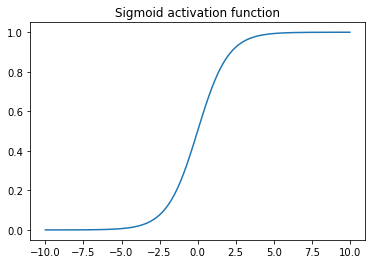

In [25]:
x=np.linspace(-10,10,100)
plt.plot(x,1/(1 + np.exp(-x)))
plt.title('Sigmoid activation function')
plt.show()

A function like this is useful for the network to be "logical".

Here is an example with logic gates.

![Truth tables](Images/intro_truth_table.png "Truth tables")

* Adding: you can just sum
* OR: you need the sigmoid to drive the output high as soon as input is present
* NAND: you need the sigmoid to stay high until both inputs are present, then deactivate completely
* XOR: you can't do this in one step, but you can combine OR and NAND together (using an AND gate)

As you can see, the sigmoid can do the OR and the NAND individually. Three sigmoid neurons working together can do the XOR. With a linear function (adding), it's impossible to get to the XOR. Can't be done!

In [26]:
def sigmoid(x): return 1/(1 + np.exp(-x))

def neuron(bias, weight1, weight2):
    print("input1 {:2d}, input2 {:2d}, output {:5.1f}".format(0, 0, sigmoid(weight1 * 0 + weight2 * 0 + bias)))
    print("input1 {:2d}, input2 {:2d}, output {:5.1f}".format(0, 1, sigmoid(weight1 * 0 + weight2 * 1 + bias)))
    print("input1 {:2d}, input2 {:2d}, output {:5.1f}".format(1, 0, sigmoid(weight1 * 1 + weight2 * 0 + bias)))
    print("input1 {:2d}, input2 {:2d}, output {:5.1f}".format(1, 1, sigmoid(weight1 * 1 + weight2 * 1 + bias)))

print("here is an OR gate")
neuron(-5, 10, 10)

print("here is a NAND gate")
neuron(15, -10, -10)

here is an OR gate
input1  0, input2  0, output   0.0
input1  0, input2  1, output   1.0
input1  1, input2  0, output   1.0
input1  1, input2  1, output   1.0
here is a NAND gate
input1  0, input2  0, output   1.0
input1  0, input2  1, output   1.0
input1  1, input2  0, output   1.0
input1  1, input2  1, output   0.0


This time, have a look at how the combination of three gates is able to replicate the XOR.

In [27]:
def sigmoid(x): return 1/(1 + np.exp(-x))

def more_neurons(input1, input2, 
                 bias_a, weight_a1, weight_a2, 
                 bias_b, weight_b1, weight_b2, 
                 bias_c, weight_c1, weight_c2):
    print("input1 {:2d}, input2 {:2d}, output {:5.1f}".format(input1, input2, 
       sigmoid(
           weight_c1 * sigmoid(weight_a1 * input1 + weight_a2 * input2 + bias_a) +
           weight_c2 * sigmoid(weight_b1 * input1 + weight_b2 * input2 + bias_b) +
           bias_c)
       ))

print("here is the XOR gate")
more_neurons(0, 0, -5, 10, 10, 15, -10, -10, -10, 5, 5)
more_neurons(1, 0, -5, 10, 10, 15, -10, -10, -10, 10, 10)
more_neurons(0, 1, -5, 10, 10, 15, -10, -10, -10, 10, 10)
more_neurons(1, 1, -5, 10, 10, 15, -10, -10, -10, 5, 5)

here is the XOR gate
input1  0, input2  0, output   0.0
input1  1, input2  0, output   1.0
input1  0, input2  1, output   1.0
input1  1, input2  1, output   0.0


Note: Sorry for the messy code. Using matrices makes things a bit cleaner.

#### The power of mixing non-linearities

The feed-forward is a mixing of data over many layers of neurons. Each layer expands data into multiple copies and its neurons compress it back into a few outputs. In the diagram far above you saw 3 units of inputs expanded into 6 synapse signals and then collapsed into 2 output signals. The power of the neural network comes from the fact that the next layer *then copies* these 2 output signals to each of its own neurons, so everything affects everything.

If three neurons in two layers can replicate the XOR logic gate, many more neurons in many more layers can take more complicated decisions.

![Colorful](Images/intro_Colorful.png "Colorful")

As you can see in the example above, data expands and contracts.

Below is another representation. You can see that the synapses/connections allow the network to perform a lot of operations on the data.

![Colorful](Images/intro_Colorful_Sizes.png "Colorful")

Or in other words, feed-forward is like a decision reached by successive committees. The neurons in a layer form a committee that looks at data together, performs analysis, and then summarizes its findings into a small report. Higher committees then analyze this report at a higher level, and so on. The final output layer makes a decision based on the accumulated wisdom of the executive summary it receives: it outputs a single value between 0 and 1.

In the committee example, the office workers use

* weights to increase, decrease or invert the importance of data
* biases to make their voices louder or weaker
* activation functions to simply their reports into a range [0,1]

The expansion and contraction of information is repeated multiple times in the neural network.

* The OR gate translated two binary signals into a 0 or 1
* The NAND gate translated two binary signals into a 0 or 1
* The AND gate looked at the OR and NAND gates' work and returned a 0 or a 1
* XOR!

All this mixing allows the neural network to do useful things. A feed forward network is not *artificial intelligence* but it is still something artificially created that is pretty useful.

### Extra: hiddens layers feed-forwarding

With all that in mind, here is a basic feed-forward network in its full matrix glory:

1. $z_1 = X W_1 + B_1$
2. $a_1 = \sigma(z_1)$
3. $z_2 = a_1 W_2 + B_2$
4. $a_2 = \sigma(z_2)$
5. $z_{output} = a_2 W_{output} + B_{output}$
6. $a_{output} = \sigma(z_{output})$

By way of comparison, here is Andrew Ng's notation.

1. $a^{(1)} = x$
2. $z^{(2)} = \theta^{(1)} a^{(1)})$
3. $a^{(2)} = g(z^{(2)})$
2. $z^{(3)} = \theta^{(2)} a^{(2)})$
3. $a^{(3)} = g(z^{(3)})$
2. $z^{(4)} = \theta^{(3)} a^{(3)})$
6. $a_{(4)} = h_{\theta}(x)=g(z^{(4)})$

Everyone has their own style.

Let's generate some data. Thanks to the properties of matrix multiplication, I can have 4 rows of input data and these will be processed fully separately, yielding 4 rows of output data. This is how you can process multiple rows of data at once, speeding things up considerably!

In [28]:
x = np.random.random((4,5)) # Four records of 5 variables
b1 = np.random.random((1,3)) # Bias: 1 x layer_1_size
w1 = np.random.random((5,3)) # Weight: input_vars x layer_1_size
b2 = np.random.random((1,2)) # Bias: 1 x layer_2_size
w2 = np.random.random((3,2)) # Weight: layer_1_size x layer_2_size
b_out = np.random.random((1,1)) # Bias: 1 x output_size
w_out = np.random.random((2,1)) # Weight: layer_2_size x output_size

Here are the activations of all the layers participating in the feed forward.

In [29]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# First hidden layer, three neurons each give an output
z1 = x.dot(w1) + b1
a1 = sigmoid(z1)
print(a1)

[[ 0.83480346  0.89431969  0.74474755]
 [ 0.92122836  0.95077352  0.85754254]
 [ 0.95632763  0.95462462  0.87675394]
 [ 0.90937448  0.88471319  0.79687147]]


In [30]:
# Second hidden layer, two neurons each give an ouput
z2 = b2 + a1.dot(w2)
a2 = sigmoid(z2)
print(a2)

[[ 0.87012514  0.86695005]
 [ 0.88290643  0.88010459]
 [ 0.88458368  0.88404378]
 [ 0.87342185  0.87610352]]


In [31]:
# Output layer: one output for each input record
z_out = b_out + a2.dot(w_out)
a_out = sigmoid(z_out)
print(a_out)

[[ 0.76292978]
 [ 0.76503123]
 [ 0.76560533]
 [ 0.76425578]]
